# DATA260P Project 2: Bin Packing Algorithms

#### Connor McManigal and Aaron Mui

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("binpacking_results.csv")

# Alter algorithm naming convention
def format_string(string_value):
    parts = string_value.strip("()").replace("'", "").split(", ")
    return parts[0] + parts[1]

df['Algorithm'] = df['Algos'].apply(format_string)
df2 = df.drop('Algos', axis=1)

# Function for plotting
def plottype(df, algo, type, axes, inits=5):
    for i in range(inits):
        df_f = df[df['Algorithm'] == f'{algo}{i}']
        axes.loglog(df_f['Data Size'], df_f[type], label=f'Run {i + 1}')
    axes.legend()
    axes.grid()
    axes.set_title(f'{algo} {type}')
    axes.set_xlabel('Log Data Size')
    axes.set_ylabel(f'Log {type}')

## NextFit

#### Descriptive Statistics

In [20]:
nextfit = df2[df2['Algorithm'].str.contains('NextFit0|NextFit1|NextFit2|NextFit3|NextFit4')]
mean_nf = nextfit.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
mean_nf = mean_nf.rename(columns={'Runtime': 'Mean Runtime','Waste': 'Mean Waste'})
print(mean_nf)

            Mean Waste  Mean Runtime
Data Size                           
100          14.229911      0.000024
200          28.558679      0.000043
400          56.627807      0.000083
800         115.816490      0.000176
1600        233.217887      0.000394
3200        458.747150      0.000718
6400        928.486310      0.001579
12800      1842.777196      0.003148
25600      3691.390597      0.006346


#### Plotting Waste and Runtime on Log-Log Scale

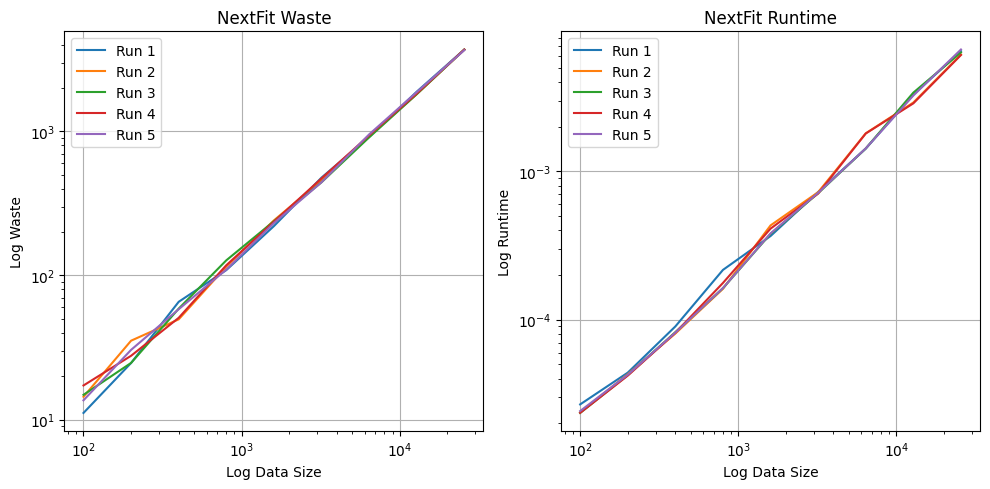

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plottype(df2, 'NextFit', 'Waste', axes[0])
plottype(df2, 'NextFit', 'Runtime', axes[1])
plt.tight_layout()
plt.show()

#### NextFit Results Diagnosis

**Estimated Waste Function of n**: 

# TODO!

**Estimated Big-O Runtime**:

# TODO!

**Results**:

# TODO!

## FirstFit

#### Descriptive Statistics

In [22]:
firstfit = df2[df2['Algorithm'].str.contains('FirstFit0|FirstFit1|FirstFit2|FirstFit3|FirstFit4')]
mean_ff = firstfit.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
mean_ff = mean_ff.rename(columns={'Runtime': 'Mean Runtime','Waste': 'Mean Waste'})
print(mean_ff)

           Mean Waste  Mean Runtime
Data Size                          
100          4.429911      0.000118
200          6.758679      0.000369
400          8.427807      0.001352
800         14.016490      0.005294
1600        20.817887      0.021371
3200        36.147150      0.089400
6400        59.486310      0.365422
12800      109.577196      1.474273
25600      209.190597      5.883045


#### Plotting Waste and Runtime on Log-Log Scale

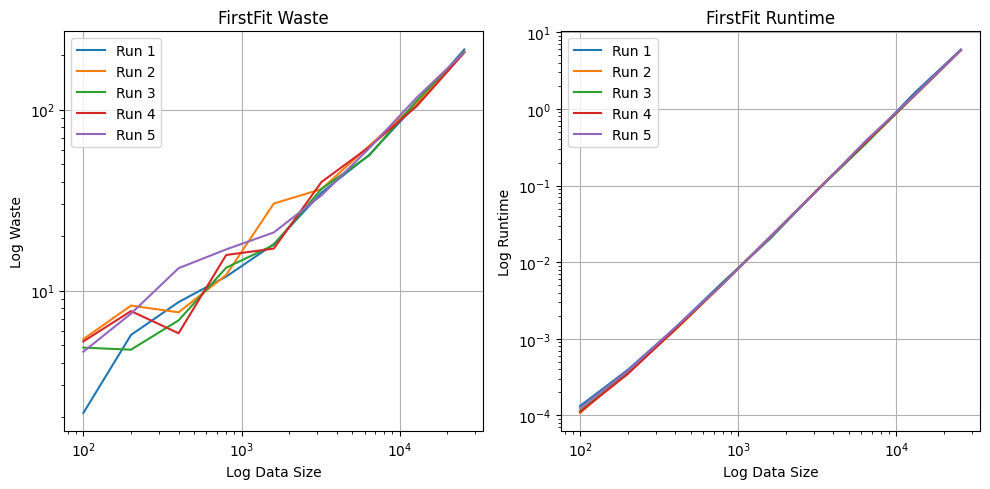

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plottype(df2, 'FirstFit', 'Waste', axes[0])
plottype(df2, 'FirstFit', 'Runtime', axes[1])
plt.tight_layout()
plt.show()

#### FirstFit Results Diagnosis

**Estimated Waste Function of n**: 

# TODO!

**Estimated Big-O Runtime**:

# TODO!

**Results**:

# TODO!

## BestFit

#### Descriptive Statistics

In [24]:
bestfit = df2[df2['Algorithm'].str.contains('BestFit0|BestFit1|BestFit2|BestFit3|BestFit4')]
mean_bf = bestfit.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
mean_bf = mean_bf.rename(columns={'Runtime': 'Mean Runtime','Waste': 'Mean Waste'})
print(mean_bf)

           Mean Waste  Mean Runtime
Data Size                          
100          3.629911      0.000338
200          4.558679      0.001171
400          6.427807      0.004331
800          9.216490      0.016818
1600        15.817887      0.067538
3200        25.747150      0.271404
6400        45.286310      1.083424
12800       80.377196      4.343436
25600      153.590597     17.311385


#### Plotting Waste and Runtime on Log-Log Scale

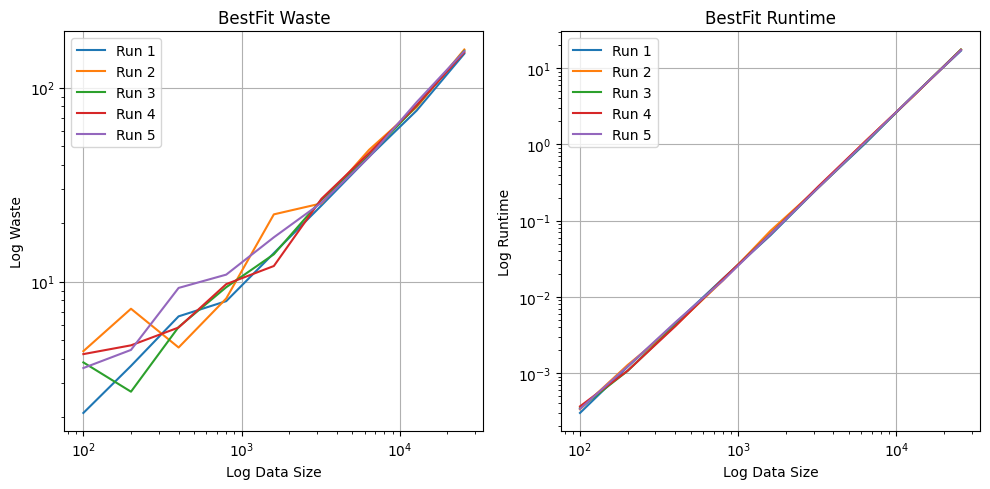

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plottype(df2, 'BestFit', 'Waste', axes[0])
plottype(df2, 'BestFit', 'Runtime', axes[1])
plt.tight_layout()
plt.show()

#### BestFit Results Diagnosis

**Estimated Waste Function of n**: 

# TODO!

**Estimated Big-O Runtime**:

# TODO!

**Results**:

# TODO!

## FirstFit Decreasing

#### Descriptive Statistics

In [26]:
firstfitdec = df2[df2['Algorithm'].str.contains('FirstFitDec0|FirstFitDec1|FirstFitDec2|FirstFitDec3|FirstFitDec4')]
mean_ffd = firstfitdec.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
mean_ffd = mean_ffd.rename(columns={'Runtime': 'Mean Runtime','Waste': 'Mean Waste'})
print(mean_ffd)

           Mean Waste  Mean Runtime
Data Size                          
100          2.229911      0.000255
200          1.558679      0.000715
400          1.027807      0.002281
800          1.016490      0.007938
1600         1.017887      0.029426
3200         1.547150      0.116396
6400         1.886310      0.455405
12800        1.977196      1.829690
25600        2.190597      7.432171


#### Plotting Waste and Runtime on Log-Log Scale

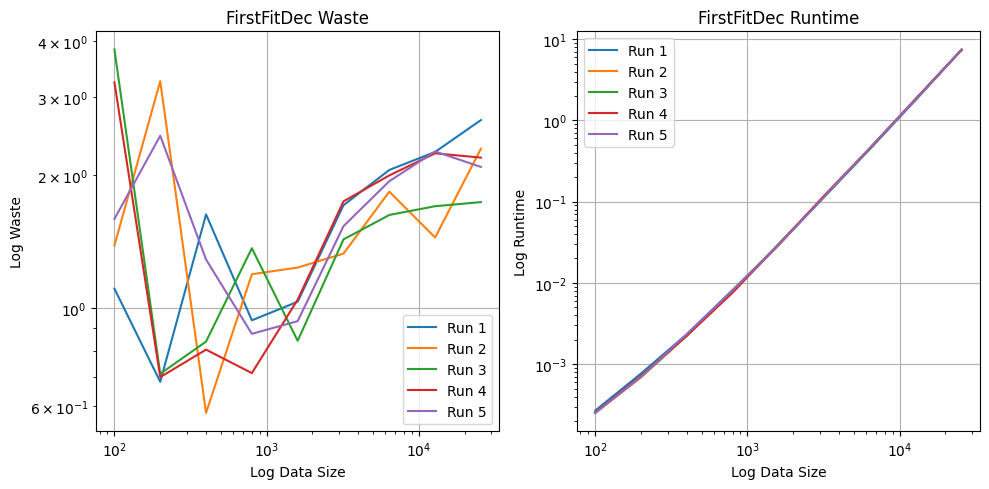

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plottype(df2, 'FirstFitDec', 'Waste', axes[0])
plottype(df2, 'FirstFitDec', 'Runtime', axes[1])
plt.tight_layout()
plt.show()

#### FirstFit Decreasing Results Diagnosis

**Estimated Waste Function of n**: 

# TODO!

**Estimated Big-O Runtime**:

# TODO!

**Results**:

# TODO!

## BestFit Decreasing

#### Descriptive Statistics

In [28]:
bestfitdec = df2[df2['Algorithm'].str.contains('BestFitDec0|BestFitDec1|BestFitDec2|BestFitDec3|BestFitDec4')]
mean_bfd = bestfitdec.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
mean_bfd = mean_bfd.rename(columns={'Runtime': 'Mean Runtime','Waste': 'Mean Waste'})
print(mean_bfd)

           Mean Waste  Mean Runtime
Data Size                          
100          2.229911      0.000568
200          1.558679      0.001883
400          0.827807      0.006641
800          1.016490      0.025631
1600         1.017887      0.100216
3200         1.547150      0.403246
6400         1.886310      1.615202
12800        1.977196      6.402005
25600        2.190597     25.428774


#### Plotting Waste and Runtime on Log-Log Scale

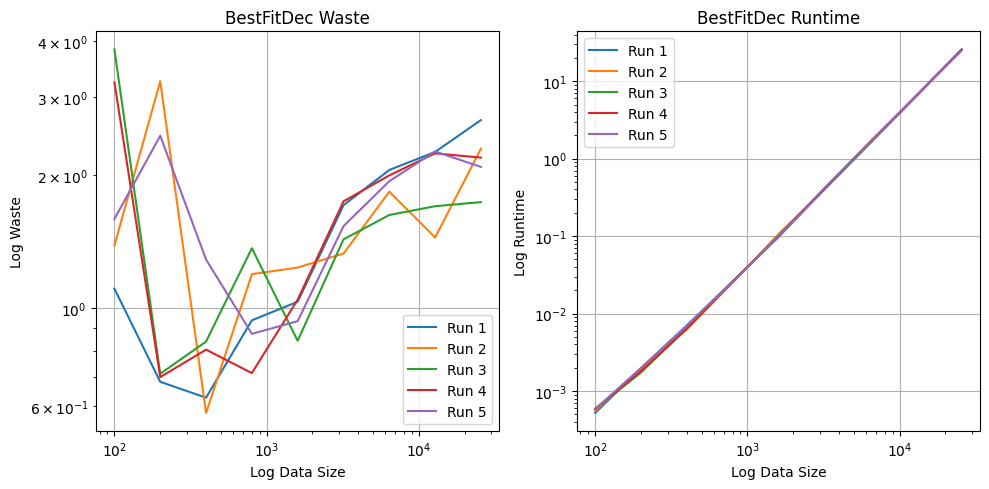

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plottype(df2, 'BestFitDec', 'Waste', axes[0])
plottype(df2, 'BestFitDec', 'Runtime', axes[1])
plt.tight_layout()
plt.show()

#### BestFit Decreasing Results Diagnosis

**Estimated Waste Function of n**: 

# TODO!

**Estimated Big-O Runtime**:

# TODO!

**Results**:

# TODO!

## CustomFit1 & CustomFit1Sorted

(Connor)

#### Motivation:

I wanted to improve ...

#### What it does:

# TODO!

### Descriptive Statistics

In [79]:
cf1 = pd.read_csv("cf1_results.csv")
cf1['Algorithm'] = cf1['Algos'].apply(format_string)
cf1 = cf1.drop('Algos', axis=1)

In [80]:
ff_results = cf1[cf1['Algorithm'].str.contains('FirstFit0|FirstFit1|FirstFit2|FirstFit3|FirstFit4')]
ff_results = ff_results.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
ff_results = ff_results.rename(columns={'Waste':'FF Mean Waste', 'Runtime':'FF Mean Runtime'})
cf1_results = cf1[cf1['Algorithm'].str.contains('CustomFit10|CustomFit11|CustomFit12|CustomFit13|CustomFit14')]
cf1_results = cf1_results.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
cf1_results = cf1_results.rename(columns={'Waste':'CF1 Mean Waste', 'Runtime':'CF1 Mean Runtime'})
cf1sorted_results = cf1[cf1['Algorithm'].str.contains('CustomFit1Sorted0|CustomFit1Sorted1|CustomFit1Sorted2|CustomFit1Sorted3|CustomFit1Sorted4')]
cf1sorted_results = cf1sorted_results.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
cf1sorted_results = cf1sorted_results.rename(columns={'Waste':'CF1 Sorted Mean Waste', 'Runtime':'CF1 Sorted Mean Runtime',})
merged_stats = ff_results.merge(cf1_results, on = 'Data Size').merge(cf1sorted_results, on = 'Data Size')
merged_stats = merged_stats[['FF Mean Waste', 'CF1 Mean Waste', 'CF1 Sorted Mean Waste', 'FF Mean Runtime', 'CF1 Mean Runtime', 'CF1 Sorted Mean Runtime']]
pd.set_option('display.width', 1000)
print(merged_stats)

           FF Mean Waste  CF1 Mean Waste  CF1 Sorted Mean Waste  FF Mean Runtime  CF1 Mean Runtime  CF1 Sorted Mean Runtime
Data Size                                                                                                                  
100             4.429911        4.029911               2.229911         0.000109          0.000250                 0.000398
200             6.758679        6.358679               2.558679         0.000370          0.000905                 0.001274
400             8.427807        8.427807               5.827807         0.001352          0.003495                 0.004433
800            14.016490       14.016490              10.816490         0.005291          0.013574                 0.016400
1600           20.817887       20.817887              23.217887         0.021487          0.054312                 0.062291
3200           36.147150       36.147150              49.347150         0.088775          0.224992                 0.246334
6400    

#### Plotting Waste and Runtime on Log-Log Scale

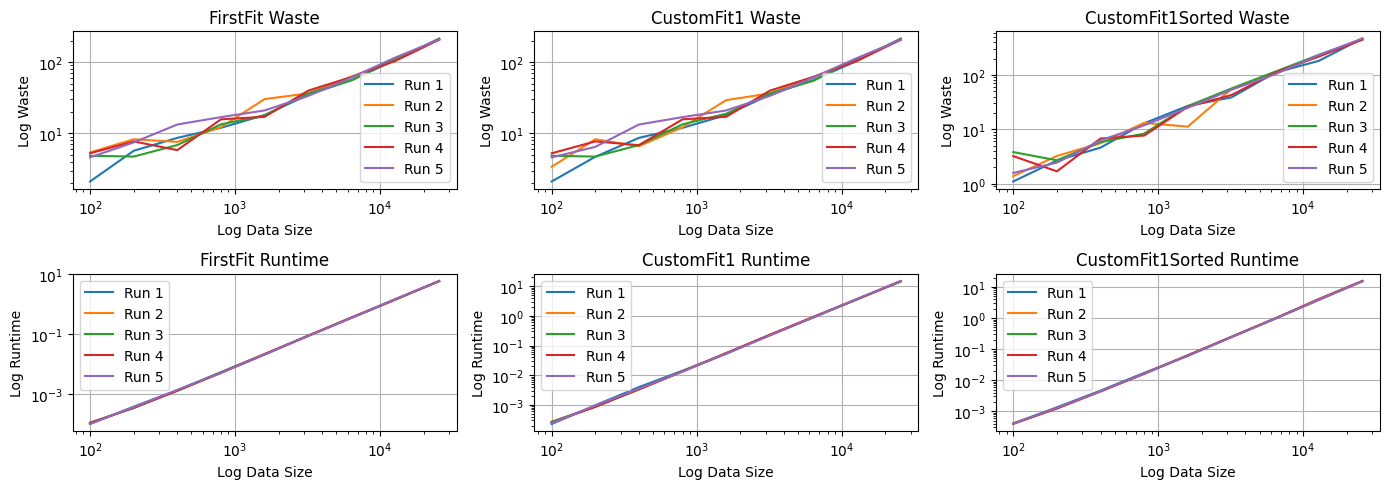

In [81]:
fig, axes = plt.subplots(2, 3, figsize=(14, 5))
plottype(cf1, 'FirstFit', 'Waste', axes[0,0])
plottype(cf1, 'CustomFit1', 'Waste', axes[0,1])
plottype(cf1, 'CustomFit1Sorted', 'Waste', axes[0,2])
plottype(cf1, 'FirstFit', 'Runtime', axes[1,0])
plottype(cf1, 'CustomFit1', 'Runtime', axes[1,1])
plottype(cf1, 'CustomFit1Sorted', 'Runtime', axes[1,2])
plt.tight_layout()
plt.show()

#### How CustomFit1 and CustomFit1Sorted match up to FirstFit:

# TODO!


## CustomFit2